# Preparing the data

## Penguins dataset from M1

Our objective is to classify with a neural network wether a penguin belongs to the Adelie specie or not.

In [1]:
# import
import pandas as pd
import numpy as np 

In [2]:
# load data
data = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
# check the data
data

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# randomize the index rows
data = data.sample(frac=1).reset_index(drop=True)

# check data
data.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,FEMALE
1,Chinstrap,Dream,55.8,19.8,207.0,4000.0,MALE
2,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE
3,Adelie,Biscoe,41.1,19.1,188.0,4100.0,MALE
4,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE


In [4]:
# data describe
print(data.describe())
print("---------------------------------------------------------------", "\n\n")

# data info
print(data.info())
print("---------------------------------------------------------------", "\n\n")

# data shape
print(data.shape)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000
--------------------------------------------------------------- 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 

## Processing the data

In [5]:
# import
from sklearn.preprocessing import MinMaxScaler

# define scaler
scaler = MinMaxScaler()

# scale the data
data_scaled = scaler.fit_transform(data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# convert the scaled data to a dataframe
data_s = pd.DataFrame(data_scaled, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# concat the dataframe to match the other features
data_s_all = pd.concat([data[['species_short', 'island', 'sex']], data_s], axis=1)
# check the data
data_s_all

,species_short,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Gentoo,Biscoe,FEMALE,0.523636,0.202381,0.762712,0.694444
1,Chinstrap,Dream,MALE,0.861818,0.797619,0.593220,0.361111
2,Gentoo,Biscoe,MALE,0.603636,0.238095,0.847458,0.736111
3,Adelie,Biscoe,MALE,0.327273,0.714286,0.271186,0.388889
4,Chinstrap,Dream,FEMALE,0.505455,0.690476,0.389831,0.402778
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,FEMALE,0.378182,0.428571,0.254237,0.180556
340,Gentoo,Biscoe,MALE,0.741818,0.297619,0.830508,0.763889
341,Gentoo,Biscoe,FEMALE,0.560000,0.107143,0.677966,0.604167
342,Gentoo,Biscoe,MALE,0.705455,0.380952,0.983051,0.777778


In [6]:
# drop columns we don't need
data_s_all = data_s_all.drop(["island", "sex"], axis=1)
# check the data
data_s_all

,species_short,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Gentoo,0.523636,0.202381,0.762712,0.694444
1,Chinstrap,0.861818,0.797619,0.593220,0.361111
2,Gentoo,0.603636,0.238095,0.847458,0.736111
3,Adelie,0.327273,0.714286,0.271186,0.388889
4,Chinstrap,0.505455,0.690476,0.389831,0.402778
...,...,...,...,...,...
339,Chinstrap,0.378182,0.428571,0.254237,0.180556
340,Gentoo,0.741818,0.297619,0.830508,0.763889
341,Gentoo,0.560000,0.107143,0.677966,0.604167
342,Gentoo,0.705455,0.380952,0.983051,0.777778


In [7]:
# drop missing values
data_s_all = data_s_all.dropna()
# check the data
data_s_all

,species_short,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Gentoo,0.523636,0.202381,0.762712,0.694444
1,Chinstrap,0.861818,0.797619,0.593220,0.361111
2,Gentoo,0.603636,0.238095,0.847458,0.736111
3,Adelie,0.327273,0.714286,0.271186,0.388889
4,Chinstrap,0.505455,0.690476,0.389831,0.402778
...,...,...,...,...,...
339,Chinstrap,0.378182,0.428571,0.254237,0.180556
340,Gentoo,0.741818,0.297619,0.830508,0.763889
341,Gentoo,0.560000,0.107143,0.677966,0.604167
342,Gentoo,0.705455,0.380952,0.983051,0.777778


In [8]:
# check .unique before converting the target to 0s or 1s
data_s_all.species_short.unique()

array(['Gentoo', 'Chinstrap', 'Adelie'], dtype=object)

In [9]:
# create a dictionari to map
specie_map = {'Adelie': 1, 'Gentoo': 0, 'Chinstrap':0}

# map it
data_s_all['species_short'] = data_s_all['species_short'].map(specie_map)
# check the data
data_s_all

<ipython-input-9-160c47716331>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_all['species_short'] = data_s_all['species_short'].map(specie_map)


,species_short,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,0.523636,0.202381,0.762712,0.694444
1,0,0.861818,0.797619,0.593220,0.361111
2,0,0.603636,0.238095,0.847458,0.736111
3,1,0.327273,0.714286,0.271186,0.388889
4,0,0.505455,0.690476,0.389831,0.402778
...,...,...,...,...,...
339,0,0.378182,0.428571,0.254237,0.180556
340,0,0.741818,0.297619,0.830508,0.763889
341,0,0.560000,0.107143,0.677966,0.604167
342,0,0.705455,0.380952,0.983051,0.777778


In [10]:
# renaming to make species the target to predict
data_s_all = data_s_all.rename(columns={'species_short': 'target'})

# move it to the right side of our data frame
cols = list(data_s_all.columns)
cols.remove('target')
cols.append('target')
data_s_all = data_s_all[cols]
# check the data
data_s_all

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,target
0,0.523636,0.202381,0.762712,0.694444,0
1,0.861818,0.797619,0.593220,0.361111,0
2,0.603636,0.238095,0.847458,0.736111,0
3,0.327273,0.714286,0.271186,0.388889,1
4,0.505455,0.690476,0.389831,0.402778,0
...,...,...,...,...,...
339,0.378182,0.428571,0.254237,0.180556,0
340,0.741818,0.297619,0.830508,0.763889,0
341,0.560000,0.107143,0.677966,0.604167,0
342,0.705455,0.380952,0.983051,0.777778,0


In [11]:
# rename the data frame
df = data_s_all

# ANN with PyTorch

We split our data in train and validation data

In [12]:
# import
from sklearn.model_selection import train_test_split
import torch

# split into features and target
X = df.drop('target', axis=1)
y = df['target']

# split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to PyTorch tensors (optional)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

## 1st variation

* 2 hidden layers
* epochs: 50
* learning_rate: 0.01

In [13]:
# import
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train_tensor, y_train_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-13-56de20d2e94f>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss: 0.10944489389657974
Loss: 0.018110064789652824
Loss: 0.015244307927787304
Loss: 0.01323571614921093
Loss: 0.018113834783434868


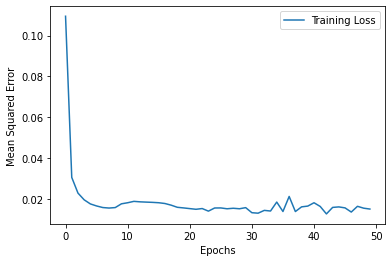

In [14]:
# import
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float), label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 2nd variation:



* 2 hidden layers
* Epochs: 10
* learning_rate: 0.01

In [15]:
epochs = 10
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train_tensor, y_train_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-15-8537ac035c91>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.12309511005878448


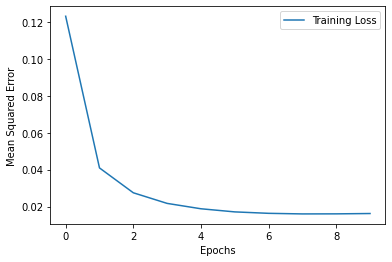

In [16]:
plt.plot(np.array(list(loss_set.values())).astype(float), label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 3d variation

* 2 hidden layers
* Epochs: 50
* learning_rate: 0.01
* Adam optimizer

In [17]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.Adam(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train_tensor, y_train_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-17-0e7119d4b64a>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.1909550577402115
Loss: 0.019861798733472824
Loss: 0.016297588124871254
Loss: 0.012034105136990547
Loss: 0.01449726615101099


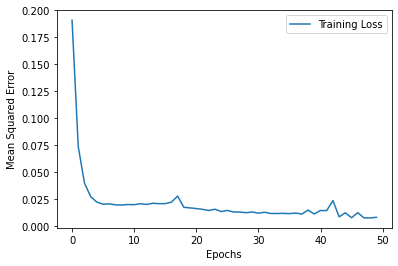

In [18]:
plt.plot(np.array(list(loss_set.values())).astype(float), label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 4th variation

* Modify it's capacity, make it deeper adding more layers, 3 layers now
* Epochs: 50
* learning_rate: 0.02
* Adam optimizer

In [19]:
epochs = 50
learning_rate = 0.02
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6), # 1st hidden layer
                         torch.nn.ReLU(),      
                         torch.nn.Linear(6,7), # 2nd hidden layer
                         torch.nn.ReLU(),
                         torch.nn.Linear(7,5), # 3d hidden layer
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()    # Sigmoid because we have a class problem
                         );
optimizer = torch.optim.Adam(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train_tensor, y_train_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-19-2ab6deb4e796>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.11288592964410782
Loss: 0.014739328064024448
Loss: 0.018317798152565956
Loss: 0.012817636132240295
Loss: 0.01670161262154579


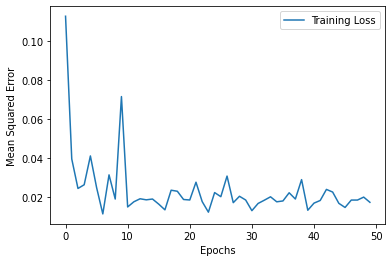

In [20]:
plt.plot(np.array(list(loss_set.values())).astype(float), label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## 5th variation

* Modify it's capacity, make it wider adding more neurons
* Epochs: 50
* learning_rate: 0.01

In [21]:
epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,7),
                         torch.nn.ReLU(),
                         torch.nn.Linear(7,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_train_tensor, y_train_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-21-2f6330e66028>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.15002045035362244
Loss: 0.016606174409389496
Loss: 0.01443051639944315
Loss: 0.01586543582379818
Loss: 0.01753012277185917


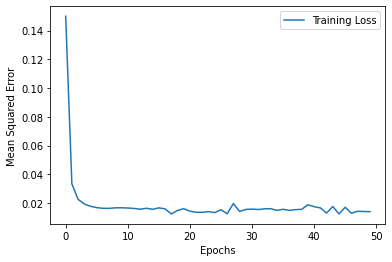

In [22]:
plt.plot(np.array(list(loss_set.values())).astype(float), label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Saving the trained model

In this case, we will save the las model, that seems to perform properly. Remember the parameters:

* Modify it's capacity, make it wider adding more neurons
* Epochs: 50
* learning_rate: 0.01

In [23]:
# save the model
torch.save(model_net5, 'model_net5.plk')

# Load the model

In [24]:
# load the model
model = torch.load('model_net5.plk')

In [25]:
# model.eval() to turn off layers such as ropout and batch normalization layers which are active during the training phase but should be turned off during inference.
model.eval()

Sequential(
  (0): Linear(in_features=4, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
df.head()

In [ ]:
# Preprocess your input data

input_data = [0.352727,	0.750000,	0.440678,	0.486111]
input_tensor = torch.tensor(input_data)

model(input_tensor)

In [ ]:
model(input_tensor)